In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [2]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)
df_orig = df.copy()
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<Axes: xlabel='Contract_period', ylabel='Age'>

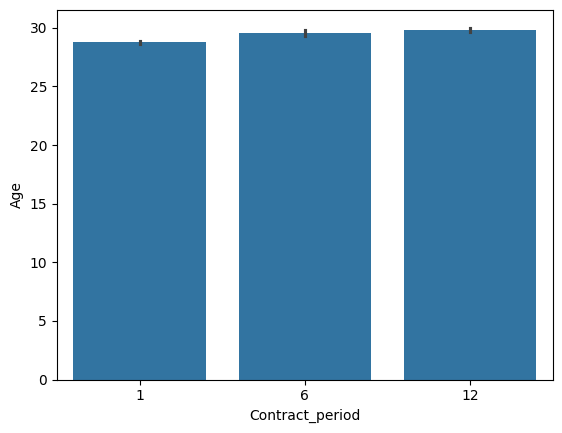

In [6]:
sns.barplot(data=df, x='Contract_period', y = 'Age')

In [8]:
churn_1 = df[df['Churn'] == 1]
churn_0 = df[df['Churn'] == 0]

Text(0.5, 1.0, 'Avg_additional_charges_total')

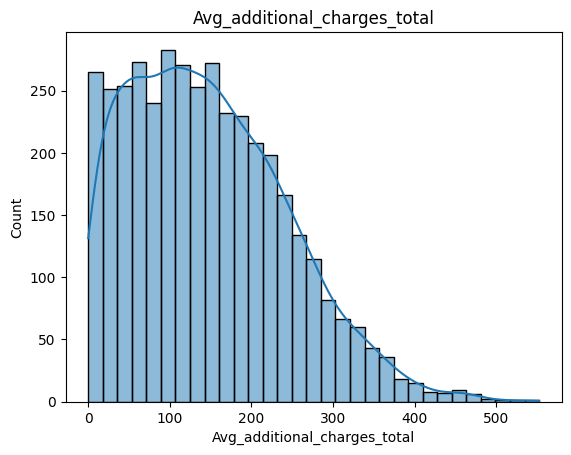

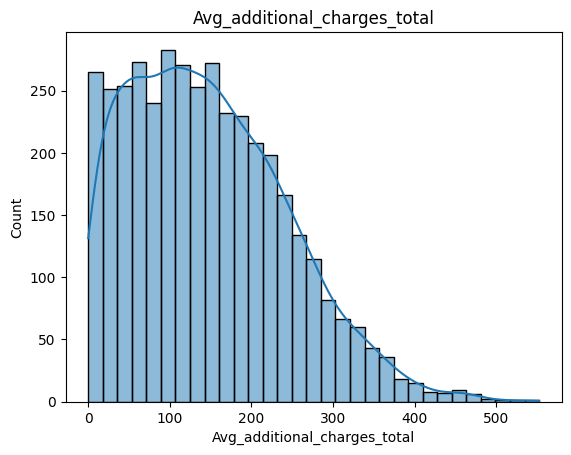

In [26]:
plt.figure()
sns.histplot(data=churn_0, x=df['Avg_additional_charges_total'], kde=True)
plt.title('Avg_additional_charges_total')

plt.figure()
sns.histplot(data=churn_1, x=df['Avg_additional_charges_total'], kde=True)
plt.title('Avg_additional_charges_total')

<Axes: ylabel='Avg_additional_charges_total'>

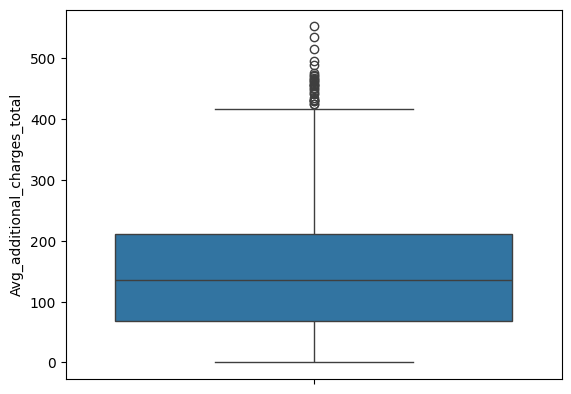

In [31]:
sns.boxplot(data=df['Avg_additional_charges_total'])

In [45]:
ages = [18,20,22,24,26,28,30,32,34,36,38,40]

df['Categories_age'] = pd.cut(df['Age'], bins=ages)
categ_avg_total_mean = df.groupby('Categories_age')['Avg_additional_charges_total'].agg(['count','mean']).reset_index()
categ_avg_total_mean

C:\Users\palux\AppData\Local\Temp\ipykernel_23980\2082720338.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categ_avg_total_mean = df.groupby('Categories_age')['Avg_additional_charges_total'].agg(['count','mean']).reset_index()


,Categories_age,count,mean
0,"(18, 20]",16,155.084698
1,"(20, 22]",57,131.322921
2,"(22, 24]",230,124.471114
3,"(24, 26]",531,141.425377
4,"(26, 28]",825,144.375458
5,"(28, 30]",925,147.348741
6,"(30, 32]",798,153.926505
7,"(32, 34]",427,149.726009
8,"(34, 36]",146,164.738320
9,"(36, 38]",39,175.564588


array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>]], dtype=object)

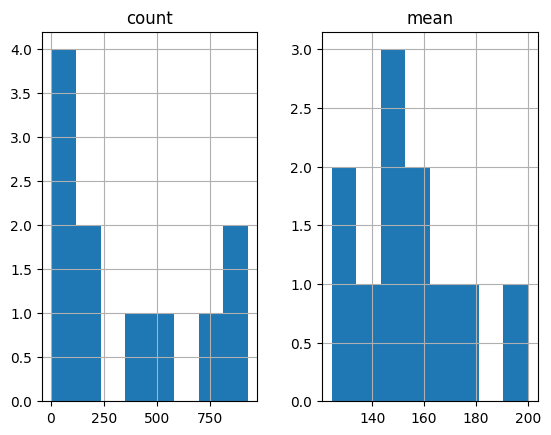

In [65]:
categ_avg_total_mean.hist(bins = 8)

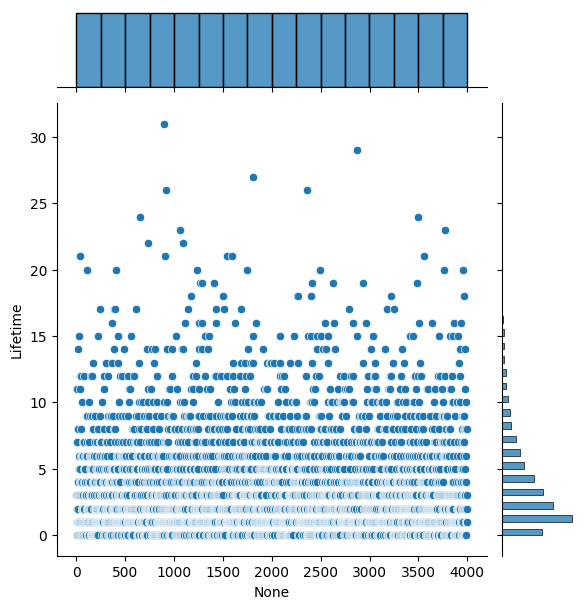

In [75]:
sns.jointplot( df['Lifetime'])

In [77]:
df['Lifetime'].value_counts().reset_index()

,Lifetime,count
0,1,843
1,2,610
2,3,490
3,0,487
4,4,383
5,5,273
6,6,220
7,7,167
8,8,111
9,9,100
